In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshchandrakar1904","key":"e8dc6dd9ad298d831330810d45590494"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          17607  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10505  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5172  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3797  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle datasets download -d simranvolunesia/pest-dataset

 94% 65.0M/69.5M [00:03<00:00, 10.1MB/s]
100% 69.5M/69.5M [00:03<00:00, 18.8MB/s]


In [ ]:
!unzip "/content/pest-dataset.zip"

Archive:  /content/pest-dataset.zip
  inflating: pest/test/aphids/jpg_0 - Copy.jpg  
  inflating: pest/test/aphids/jpg_0.jpg  
  inflating: pest/test/aphids/jpg_11 - Copy.jpg  
  inflating: pest/test/aphids/jpg_11.jpg  
  inflating: pest/test/aphids/jpg_13 - Copy.jpg  
  inflating: pest/test/aphids/jpg_13.jpg  
  inflating: pest/test/aphids/jpg_15 - Copy.jpg  
  inflating: pest/test/aphids/jpg_15.jpg  
  inflating: pest/test/aphids/jpg_16.jpg  
  inflating: pest/test/aphids/jpg_19.jpg  
  inflating: pest/test/aphids/jpg_2 - Copy.jpg  
  inflating: pest/test/aphids/jpg_2.jpg  
  inflating: pest/test/aphids/jpg_23.jpg  
  inflating: pest/test/aphids/jpg_24.jpg  
  inflating: pest/test/aphids/jpg_25.jpg  
  inflating: pest/test/aphids/jpg_27.jpg  
  inflating: pest/test/aphids/jpg_29.jpg  
  inflating: pest/test/aphids/jpg_30.jpg  
  inflating: pest/test/aphids/jpg_32.jpg  
  inflating: pest/test/aphids/jpg_33.jpg  
  inflating: pest/test/aphids/jpg_35.jpg  
  inflating: pest/test/aphids/

In [ ]:
from os import walk
path = 'pest/train'
labels = []
for (dirpath, folder, filenames) in walk(path):
    labels.extend(folder)
    break

In [ ]:
print(labels)

['aphids', 'bollworm', 'grasshopper', 'armyworm', 'sawfly', 'mites', 'mosquito', 'beetle', 'stem_borer']


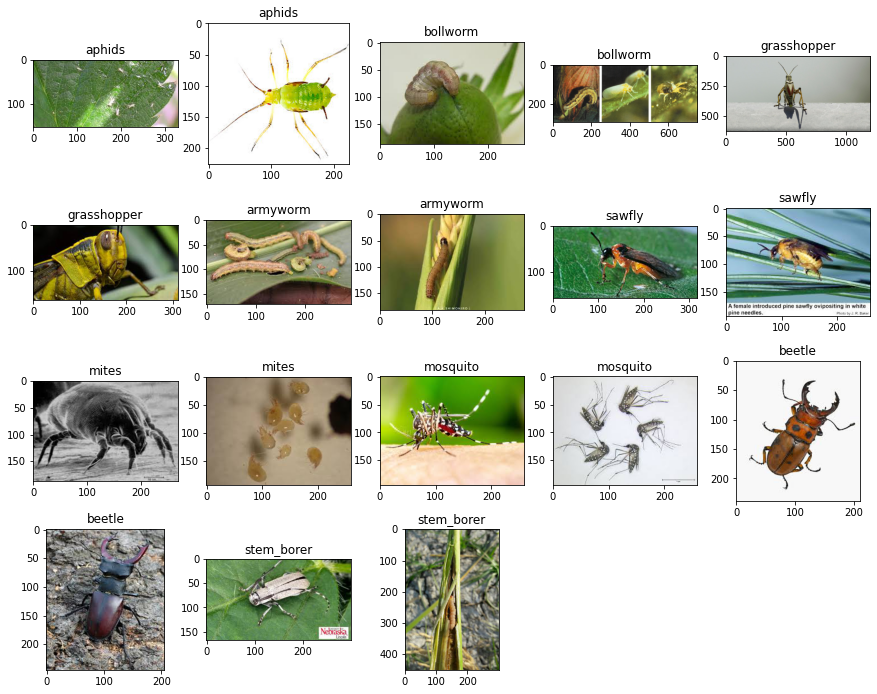

In [ ]:
plt.figure(figsize = (15,15))
cnt=0
num=[]
for label in labels:
    temppath = f'pest/train/{label}/'
    for (dirpath, folder, imgs) in walk(temppath):
        for i in range(2):
            img = imgs[i]
            impath = temppath+img
            img = mpimg.imread(impath)
            plt.subplot(5,5,cnt+i+1)
            plt.imshow(img)
            plt.title(label)
        num.append(len(imgs))
        cnt+=2


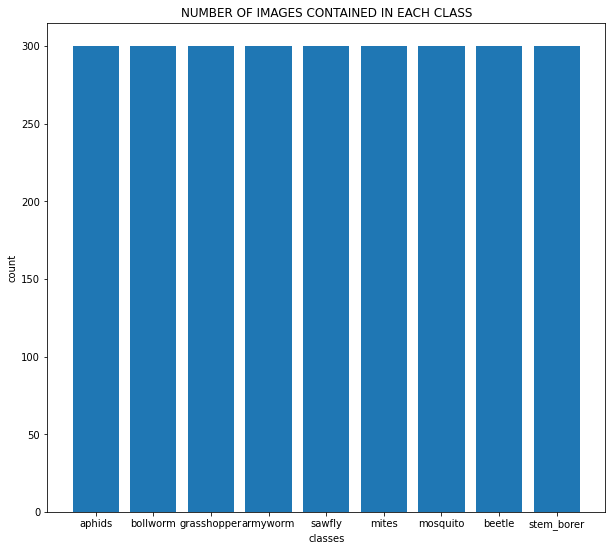

In [ ]:
plt.figure(figsize = (10,9))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    temppath = f'pest/train/{label}/'
    for (dirpath, folder, imgs) in walk(temppath):
        for image_path in imgs:
            image = cv2.imread(temppath+image_path)
            image_resized = cv2.resize(image, (32,32))
            x_data.append(np.array(image_resized))
            y_data.append(label)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (2700, 32, 32, 3) and that of Y is:  (2700,)


In [ ]:
xn_data = x_data.astype('float32')/255

## CNN

In [ ]:
r = np.arange(xn_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = xn_data[r]
Y = y_categorical[r]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
Y_test = np.argmax(Y_test, axis = 1)

In [ ]:
from keras import models, layers
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn.add(layers.MaxPool2D(pool_size=(2, 2)))
cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(rate=0.25))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dropout(rate=0.5))
cnn.add(layers.Dense(9, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
cnn.compile(loss='categorical_crossentropy', 
    optimizer=Adam(lr=0.001) ,metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
withnormal = cnn.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
48/48 [==============================] - 3s 54ms/step - loss: 2.1580 - accuracy: 0.1594 - val_loss: 2.0330 - val_accuracy: 0.2804
Epoch 2/25
48/48 [==============================] - 2s 50ms/step - loss: 1.9006 - accuracy: 0.3161 - val_loss: 1.7367 - val_accuracy: 0.3624
Epoch 3/25
48/48 [==============================] - 2s 50ms/step - loss: 1.6446 - accuracy: 0.4173 - val_loss: 1.5023 - val_accuracy: 0.5132
Epoch 4/25
48/48 [==============================] - 2s 50ms/step - loss: 1.4341 - accuracy: 0.4802 - val_loss: 1.2777 - val_accuracy: 0.6111
Epoch 5/25
48/48 [==============================] - 2s 50ms/step - loss: 1.1942 - accuracy: 0.5913 - val_loss: 1.0680 - val_accuracy: 0.6825
Epoch 6/25
48/48 [==============================] - 2s 51ms/step - loss: 0.9822 - accuracy: 0.6673 - val_loss: 0.8690 - val_accuracy: 0.7354
Epoch 7/25
48/48 [==============================] - 2s 51ms/step - loss: 0.8085 - accuracy: 0.7242 - val_loss: 0.8539 - val_accuracy: 0.7434
Epoch 8/25
48

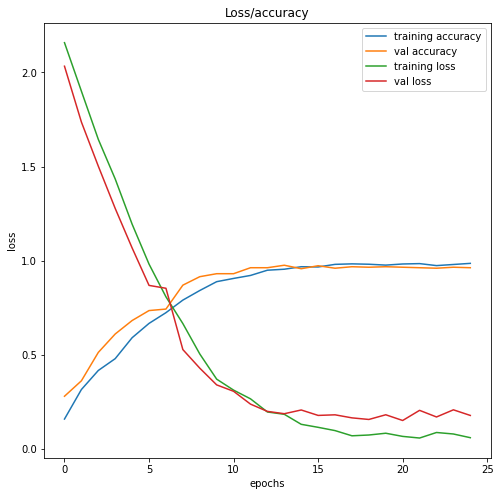

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(withnormal.history['accuracy'], label='training accuracy')
plt.plot(withnormal.history['val_accuracy'], label='val accuracy')
plt.plot(withnormal.history['loss'], label='training loss')
plt.plot(withnormal.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

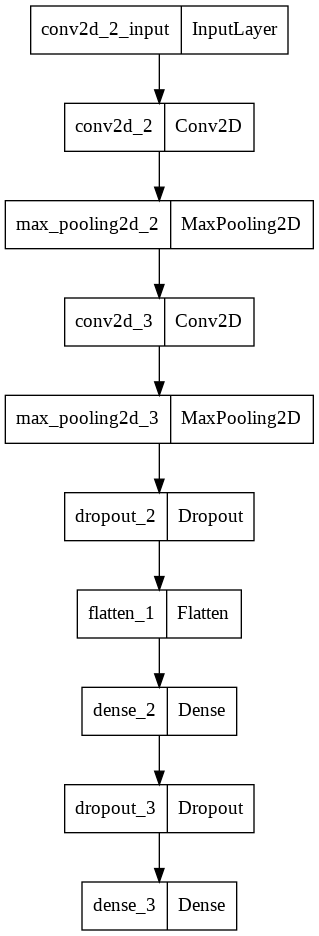

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn)

In [ ]:
Y_pred=cnn.predict(X_test) 
Y_pred=np.argmax(Y_pred,axis=1)
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print()
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.9567901234567902

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.96      0.98       101
           2       0.91      0.96      0.93        90
           3       0.89      1.00      0.94        86
           4       0.95      0.93      0.94        87
           5       0.94      0.95      0.95        87
           6       1.00      0.97      0.98        93
           7       0.95      0.96      0.95        91
           8       0.98      0.89      0.93        93

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



Text(69.0, 0.5, 'Truth')

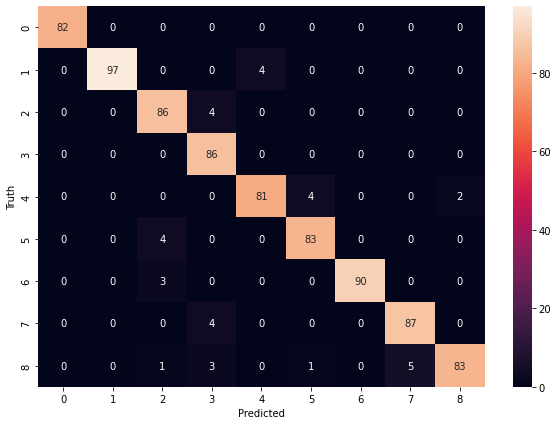

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    temppath = f'pest/train/{label}/'
    for (dirpath, folder, imgs) in walk(temppath):
        for image_path in imgs:
            image = cv2.imread(temppath+image_path)
            image_resized = cv2.resize(image, (56,56)).flatten()
            x_data.append(np.array(image_resized))
            y_data.append(label)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
xn_data = x_data.astype('float32')/255

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [ ]:
r = np.arange(xn_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = xn_data[r]
Y = y_encoded[r]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
ann=keras.Sequential([keras.layers.Dense(9, input_shape=(9408,)),
                        keras.layers.Dense(9, input_shape=(9408,),activation='sigmoid')])
ann.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
anns=ann.fit(X_train, Y_train, validation_split=0.3, batch_size=5,epochs=25)

Epoch 1/25
265/265 [==============================] - 1s 3ms/step - loss: 3.3678 - accuracy: 0.2275 - val_loss: 3.9528 - val_accuracy: 0.2399
Epoch 2/25
265/265 [==============================] - 1s 3ms/step - loss: 2.4517 - accuracy: 0.3341 - val_loss: 3.9398 - val_accuracy: 0.1764
Epoch 3/25
265/265 [==============================] - 1s 3ms/step - loss: 1.8164 - accuracy: 0.4543 - val_loss: 3.0508 - val_accuracy: 0.3245
Epoch 4/25
265/265 [==============================] - 1s 3ms/step - loss: 1.6257 - accuracy: 0.5253 - val_loss: 1.6604 - val_accuracy: 0.4568
Epoch 5/25
265/265 [==============================] - 1s 3ms/step - loss: 1.2918 - accuracy: 0.5949 - val_loss: 1.1887 - val_accuracy: 0.6014
Epoch 6/25
265/265 [==============================] - 1s 3ms/step - loss: 1.2782 - accuracy: 0.5986 - val_loss: 1.0519 - val_accuracy: 0.6790
Epoch 7/25
265/265 [==============================] - 1s 3ms/step - loss: 1.0298 - accuracy: 0.6636 - val_loss: 3.0733 - val_accuracy: 0.3686
Epoch 

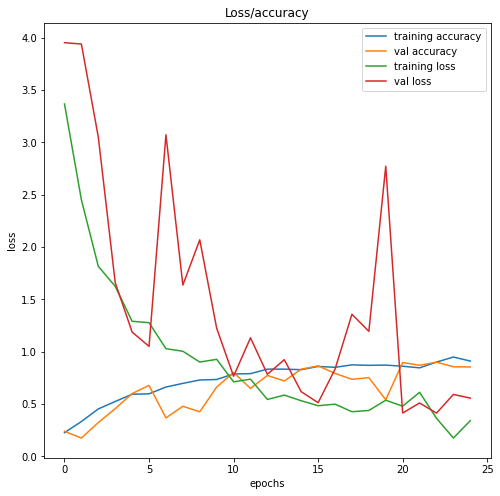

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(anns.history['accuracy'], label='training accuracy')
plt.plot(anns.history['val_accuracy'], label='val accuracy')
plt.plot(anns.history['loss'], label='training loss')
plt.plot(anns.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
Y_pred=ann.predict(X_test) 
Y_pred=np.argmax(Y_pred,axis=1)
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print()
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.8469135802469135

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.92      0.86      0.89       101
           2       0.99      0.80      0.88        90
           3       0.88      0.95      0.92        86
           4       0.79      0.93      0.86        87
           5       0.94      0.90      0.92        87
           6       0.58      0.97      0.72        93
           7       1.00      0.44      0.61        91
           8       0.87      0.84      0.85        93

    accuracy                           0.85       810
   macro avg       0.88      0.85      0.85       810
weighted avg       0.88      0.85      0.84       810



Text(69.0, 0.5, 'Truth')

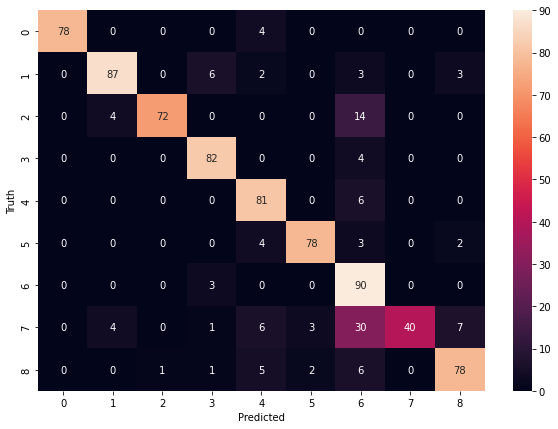

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

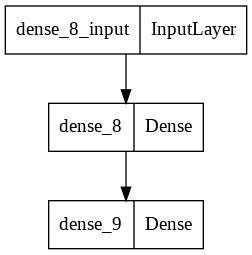

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(ann)